In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("AirPassengers.csv")

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [8]:
# Object types datatype has to be changed into the date format
df['Month']=pd.to_datetime(df['Month'], format='%Y-%m')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df.index

RangeIndex(start=0, stop=144, step=1)

C:\Users\KIIT01\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='#Passengers'>

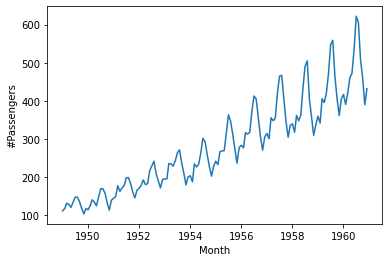

In [11]:
sns.lineplot(df['Month'],df['#Passengers'])

In [12]:
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()

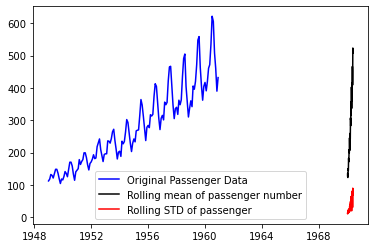

In [13]:
plt.plot(df['Month'],df['#Passengers'],color='blue', label='Original Passenger Data')
plt.plot(rolling_mean, color='black', label="Rolling mean of passenger number")
plt.plot(rolling_std, color='red', label = 'Rolling STD of passenger')
plt.legend(loc="best")
plt.show()

In [14]:
df = df.set_index("Month")
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [15]:
# Augmented dickey-fuller test 
from statsmodels.tsa.stattools import adfuller
adft = adfuller(df, autolag="AIC")

In [16]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  ,
                          "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

       Values                       Metric
0    0.815369              Test Statistics
1    0.991880                      p-value
2   13.000000             No. of lags used
3  130.000000  Number of observations used
4   -3.481682          critical value (1%)
5   -2.884042          critical value (5%)
6   -2.578770         critical value (10%)


AUTOCORRELATION:
checking time series data for autocorrelation in python is another important part of the analytic process. this is a measure of how correlated time series data is at the given point of time with the past values which has huge implications across many industries. for example, if our passanger data has strong autocorrelation, we can assume that high passenger numbers today suggests a strong likelihood that they will be high tomorrow as well.

The pandas dataframe has an autocorrelation method that we can use to calculate the autocorrelation in our passanger data. lets do this for a one-month lag:

In [17]:
autocorrelation_lag1 = df['#Passengers'].autocorr(lag=1)
print("One Month Lag:", autocorrelation_lag1)

One Month Lag: 0.9601946480498523


In [18]:
autocorrelation_lag3 = df['#Passengers'].autocorr(lag=3)
print("Three Month Lag:", autocorrelation_lag3)
autocorrelation_lag6 = df['#Passengers'].autocorr(lag=6)
print("Six Month Lag:", autocorrelation_lag6)
autocorrelation_lag9 = df['#Passengers'].autocorr(lag=9)
print("Nine Month Lag:", autocorrelation_lag9)

Three Month Lag: 0.837394765081794
Six Month Lag: 0.7839187959206183
Nine Month Lag: 0.8278519011167601


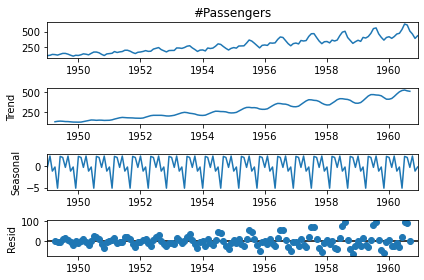

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['#Passengers'], model='additive',  period =7)
decompose.plot()
plt.show()

In [20]:
df['Date'] = df.index

In [21]:
train = df[df['Date']<pd.to_datetime("1960-08", format='%Y-%m')]
train['train']= train['#Passengers']
test = df[df['Date'] >= pd.to_datetime("1960-08", format='%Y-%m')]
test['test'] = test['#Passengers']

C:\Users\KIIT01\AppData\Local\Temp/ipykernel_44580/27074124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train']= train['#Passengers']
C:\Users\KIIT01\AppData\Local\Temp/ipykernel_44580/27074124.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['#Passengers']


In [22]:
train = train.drop(['#Passengers','Date'],axis = True)
test = test.drop(['#Passengers','Date'],axis = True)

In [23]:
test

,test
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


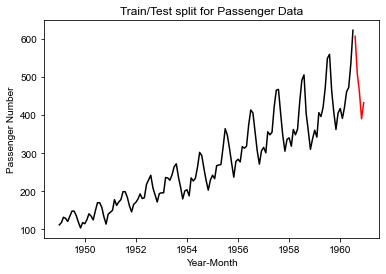

In [24]:
plt.plot(train,color="black")
plt.plot(test,color="red")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.show()

In [27]:
from pmdarima.ariam import auto_arima

ModuleNotFoundError: No module named 'pmdarima'

In [26]:
!pip install pmdarima

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\KIIT01\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\KIIT01\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\KIIT01\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\KIIT01\anaconda3\lib\http\client.py", line 462, in read
    n = self.readinto(b)
  File "C:\Users\KIIT01\anaconda3\lib\http\client.py", line 506, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\KIIT01\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\KIIT01\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\KIIT01\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buf